In [1]:
import pandas
from matplotlib import pyplot as plt
df = pandas.read_csv("sales_train.csv")
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [12]:
df['date'] = pandas.to_datetime(df['date'],format='%d.%m.%Y')
df1 = df.groupby('date')['item_cnt_day'].sum().rename('Sales')

In [13]:
df1

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
               ...  
2015-10-27    1551.0
2015-10-28    3593.0
2015-10-29    1589.0
2015-10-30    2274.0
2015-10-31    3104.0
Name: Sales, Length: 1034, dtype: float64

<AxesSubplot:xlabel='date'>

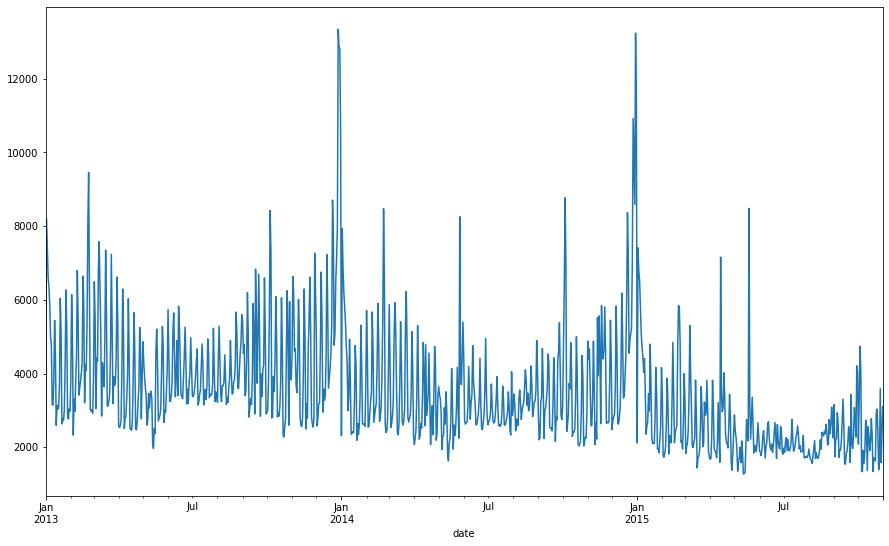

In [22]:
plt.figure(figsize=(15,9))
plt.grid(True)
df1.plot()

In [26]:
def plot_ts(df1, plot_ma=True, window=30,):
    rolling_mean = df1.rolling(window=window).mean()       
    plt.title(df1.name)    
    plt.plot(df1[window:], label='Actual values', color="black")    
    if plot_ma:
        plt.plot(rolling_mean, 'g', label='MA->'+str(window),color="red")
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()


/tmp/ipykernel_6578/3325044516.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA->'+str(window),color="red")


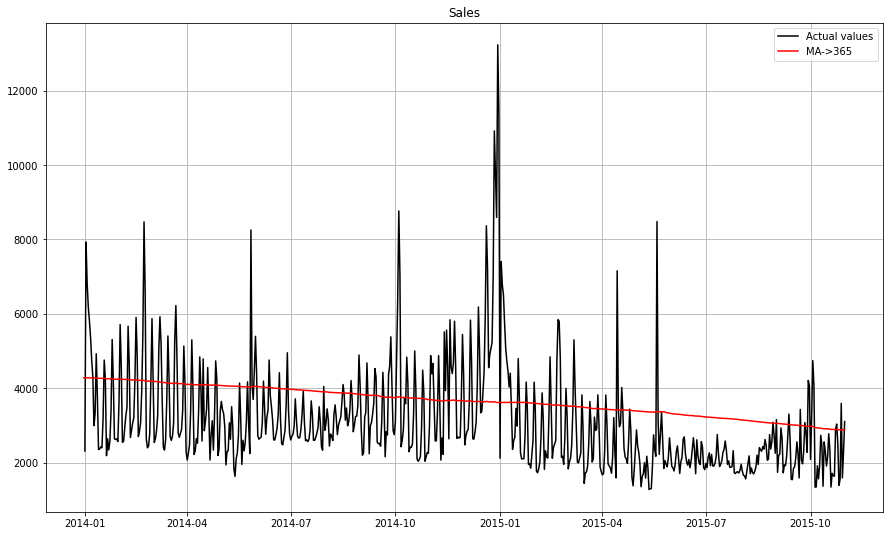

In [35]:
plt.figure(figsize=(15,9))
plot_ts(df1,window=365)

From above figure, it is clear that for 365 days, It is linear **downtrend**.